<a href="https://colab.research.google.com/github/Jai-Keshav-Sharma/ML_from_scratch/blob/main/Dbscan%20from%20scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def euclidean_distance(p, q):
    """
    Compute Euclidean distance between two points p and q.
    p and q are 1D numpy arrays.
    """
    return np.sqrt(np.sum((p - q) ** 2))


In [ ]:
def get_neighbors(X, idx, eps):
    """
    Return indices of all points in X that are within distance eps
    from point X[idx].
    """
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors


In [ ]:
def dbscan(X, eps, min_pts):
    """
    Perform DBSCAN clustering.

    Parameters:
    - X: numpy array of shape (n_samples, n_features)
    - eps: radius for neighborhood
    - min_pts: minimum number of points to form a dense region (core point)

    Returns:
    - labels: numpy array of shape (n_samples,)
      labels[i] = cluster id (1,2,3,...) or -1 for noise
    """
    n = len(X)

    # -1 means noise by default
    labels = np.full(n, -1, dtype=int)

    # to track which points have already been visited
    visited = np.zeros(n, dtype=bool)

    cluster_id = 0

    for i in range(n):
        if visited[i]:
            continue

        # mark this point as visited
        visited[i] = True

        # find neighbors of point i
        neighbors = get_neighbors(X, i, eps)

        # if not enough neighbors, it's noise (remain label -1)
        if len(neighbors) < min_pts:
            continue

        # we found a new cluster
        cluster_id += 1
        labels[i] = cluster_id

        # we will grow the cluster by exploring neighbors
        j = 0
        while j < len(neighbors):
            neighbor_idx = neighbors[j]

            # if this neighbor hasn't been visited yet, visit it
            if not visited[neighbor_idx]:
                visited[neighbor_idx] = True
                new_neighbors = get_neighbors(X, neighbor_idx, eps)

                # if this neighbor is a core point, add its neighbors to the list
                if len(new_neighbors) >= min_pts:
                    # extend the neighbors list (may add duplicates, it's okay)
                    neighbors.extend(new_neighbors)

            # if this neighbor is currently labeled as noise, assign it to the cluster
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id

            j += 1

    return labels


In [ ]:
def plot_dbscan_result(X, labels):
    """
    Plot 2D points colored by their DBSCAN cluster label.
    Noise points (label = -1) are shown with a different marker.
    """
    unique_labels = np.unique(labels)

    for lbl in unique_labels:
        cluster_points = X[labels == lbl]

        if lbl == -1:
            # noise
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker='x', label='noise')
        else:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'cluster {lbl}')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("DBSCAN Clustering Result")
    plt.legend()
    plt.show()


Cluster labels for each point:
[ 1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2]


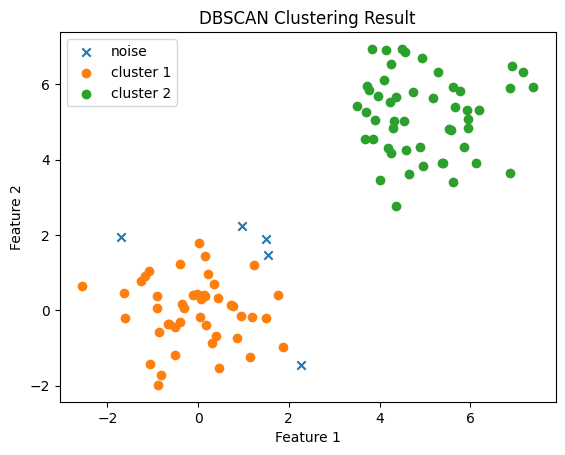

In [ ]:
# Create a simple 2-cluster dataset
np.random.seed(0)

cluster_1 = np.random.randn(50, 2) + np.array([0, 0])
cluster_2 = np.random.randn(50, 2) + np.array([5, 5])
X = np.vstack((cluster_1, cluster_2))

# Run DBSCAN
eps = 1.0      # try changing this
min_pts = 5    # try changing this
labels = dbscan(X, eps, min_pts)

print("Cluster labels for each point:")
print(labels)

# Plot the result
plot_dbscan_result(X, labels)


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

### Evaluating Clustering Results with Silhouette Score and Davies-Bouldin Index

- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high value indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. Scores near 0 indicate overlapping clusters, and negative scores indicate that an object might have been assigned to the wrong cluster.

- **Davies-Bouldin Index**: Measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin index relates to a model with better separation between the clusters. A score of 0 is the lowest possible value.

In [ ]:
# Create a simple 2-cluster dataset - Re-including for robustness in case kernel state is lost
np.random.seed(0)

cluster_1 = np.random.randn(50, 2) + np.array([0, 0])
cluster_2 = np.random.randn(50, 2) + np.array([5, 5])
X = np.vstack((cluster_1, cluster_2))

# Run DBSCAN - Re-including for robustness
eps = 1.0
min_pts = 5
labels = dbscan(X, eps, min_pts)

# For Silhouette Score and Davies-Bouldin Index, we need to exclude noise points (-1 label)
# Filter out noise points and their corresponding data

# Create a boolean mask to identify non-noise points
non_noise_mask = (labels != -1)

# Apply the mask to X and labels
X_filtered = X[non_noise_mask]
labels_filtered = labels[non_noise_mask]

# Check if there are at least 2 clusters and more than 1 point to calculate metrics
if len(np.unique(labels_filtered)) > 1 and len(X_filtered) > 1:
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_filtered, labels_filtered)
    print(f"Silhouette Score: {silhouette_avg:.4f}")

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(X_filtered, labels_filtered)
    print(f"Davies-Bouldin Index: {db_index:.4f}")
else:
    print("Cannot calculate Silhouette Score or Davies-Bouldin Index. Not enough clusters or points (excluding noise).")


Silhouette Score: 0.7607
Davies-Bouldin Index: 0.3398
